In [1]:
%matplotlib notebook
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [3]:
def calculate_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

In [4]:
def detect_landmarks_and_distances(image, reference_points):
    global conversion_factor

    # Calculate distance between selected points (in pixels)
    reference_distance_pixels = np.sqrt((reference_points[0][0] - reference_points[1][0])**2 + (reference_points[0][1] - reference_points[1][1])**2)

    # Define the real-world length of the reference scale (in centimeters)
    reference_length_cm = 30  # Length of the reference scale in centimeters

    # Calculate the conversion factor (pixels to centimeters)
    conversion_factor = reference_length_cm / reference_distance_pixels

    print("Conversion factor (pixels to cm):", conversion_factor)

    # Detect faces in the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    # Loop over each detected face
    for face in faces:
        landmarks = predictor(gray, face)

        # Extract landmark coordinates
        landmarks_points = []
        for i in range(68):
            x = landmarks.part(i).x
            y = landmarks.part(i).y
            landmarks_points.append((x, y))

        # Calculate distances for each anthropological facial parameter using conversion factor
        eye_width_cm = calculate_distance(landmarks_points[36], landmarks_points[45]) * conversion_factor
        mouth_width_cm = calculate_distance(landmarks_points[48], landmarks_points[54]) * conversion_factor
        philtrum_length_cm = calculate_distance(landmarks_points[62], landmarks_points[33]) * conversion_factor
        upper_face_breadth_cm = calculate_distance(landmarks_points[0], landmarks_points[16]) * conversion_factor
        middle_face_length_cm = calculate_distance(landmarks_points[27], landmarks_points[33]) * conversion_factor

        # Print the calculated distances in centimeters
        print("Width of the eye:", eye_width_cm, "cm")
        print("Width of the mouth:", mouth_width_cm, "cm")
        print("Length of the philtrum:", philtrum_length_cm, "cm")
        print("Upper face breadth:", upper_face_breadth_cm, "cm")
        print("Middle face length:", middle_face_length_cm, "cm")

        # Draw distances on the image
        cv2.putText(image, f"Eye width: {eye_width_cm:.2f} cm", (20, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        cv2.putText(image, f"Mouth width: {mouth_width_cm:.2f} cm", (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        cv2.putText(image, f"Philtrum length: {philtrum_length_cm:.2f} cm", (20, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        cv2.putText(image, f"Upper face breadth: {upper_face_breadth_cm:.2f} cm", (20, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        cv2.putText(image, f"Middle face length: {middle_face_length_cm:.2f} cm", (20, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # Draw landmarks on the image
        for landmark in landmarks_points:
            cv2.circle(image, landmark, 1, (0, 0, 255), -1)

    return image

In [5]:
def onclick(event):
    global selected_points
    if event.button == 1:
        x = int(round(event.xdata))
        y = int(round(event.ydata))
        selected_points.append((x, y))
        print("Selected point:", (x, y))
        ax.scatter(x, y, color='green', s=50)  # Mark selected point on the image
        plt.draw()

        # Draw line between two selected points if both points are selected
        if len(selected_points) == 2:
            ax.plot([selected_points[0][0], selected_points[1][0]], [selected_points[0][1], selected_points[1][1]], color='red', linewidth=2)  # Draw red line
            
            # Calculate and display the distance between the selected points
            reference_distance_pixels = np.sqrt((selected_points[0][0] - selected_points[1][0])**2 + (selected_points[0][1] - selected_points[1][1])**2)
            reference_length_cm = 30  # Length of the reference scale in centimeters
            conversion_factor = reference_length_cm / reference_distance_pixels
            
            # Display the distance and reference length in centimeters
            ax.text(selected_points[0][0], selected_points[0][1], f'{reference_distance_pixels:.2f} px', color='red', fontsize=10, ha='right', va='bottom')
            ax.text(selected_points[1][0], selected_points[1][1], f'{reference_length_cm:.2f} cm', color='red', fontsize=10, ha='right', va='top')

            eye_width_cm, mouth_width_cm, philtrum_length_cm, upper_face_breadth_cm, middle_face_length_cm = detect_landmarks_and_distances(image, selected_points)
            print("Eye width:", eye_width_cm, "cm")
            print("Mouth width:", mouth_width_cm, "cm")
            print("Philtrum length:", philtrum_length_cm, "cm")
            print("Upper face breadth:", upper_face_breadth_cm, "cm")
            print("Middle face length:", middle_face_length_cm, "cm")


<IPython.core.display.Javascript object>


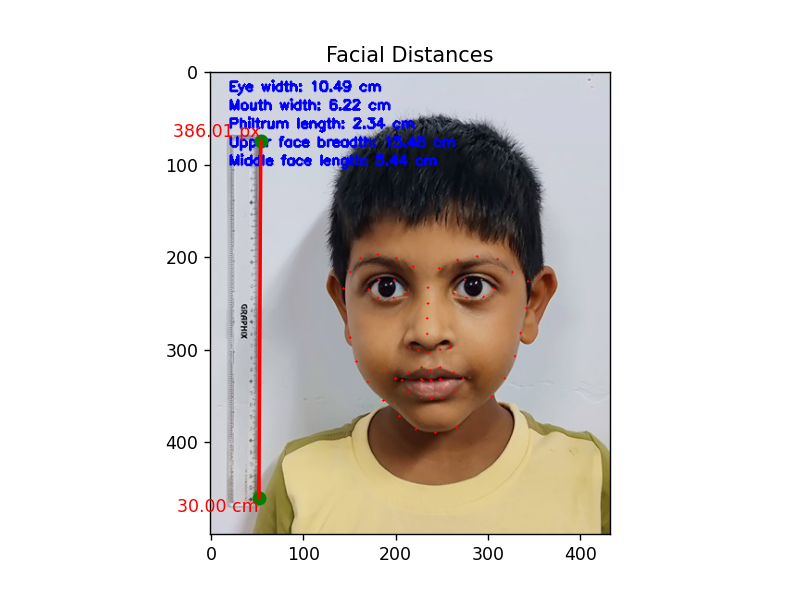

In [6]:
image_path =  r"C:\Users\WELCOME\Downloads\kutty paiyan.jpg"  # Replace with the path to your image
image = cv2.imread(image_path)
fig, ax = plt.subplots()
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax.set_title('Select two points for reference scale (30 cm)')
selected_points = []

In [7]:
fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [8]:
def detect_landmarks_and_distances(image, reference_points):
    global conversion_factor

    # Calculate distance between selected points (in pixels)
    reference_distance_pixels = np.sqrt((reference_points[0][0] - reference_points[1][0])**2 + (reference_points[0][1] - reference_points[1][1])**2)

    # Define the real-world length of the reference scale (in centimeters)
    reference_length_cm = 30  # Length of the reference scale in centimeters

    # Calculate the conversion factor (pixels to centimeters)
    conversion_factor = reference_length_cm / reference_distance_pixels

    print("Conversion factor (pixels to cm):", conversion_factor)

    # Detect faces in the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    # Loop over each detected face
    for face in faces:
        landmarks = predictor(gray, face)

        # Extract landmark coordinates
        landmarks_points = []
        for i in range(68):
            x = landmarks.part(i).x
            y = landmarks.part(i).y
            landmarks_points.append((x, y))

        # Calculate distances for each anthropological facial parameter using conversion factor
        eye_width_cm = calculate_distance(landmarks_points[36], landmarks_points[45]) * conversion_factor
        mouth_width_cm = calculate_distance(landmarks_points[48], landmarks_points[54]) * conversion_factor
        philtrum_length_cm = calculate_distance(landmarks_points[62], landmarks_points[33]) * conversion_factor
        upper_face_breadth_cm = calculate_distance(landmarks_points[0], landmarks_points[16]) * conversion_factor
        middle_face_length_cm = calculate_distance(landmarks_points[27], landmarks_points[33]) * conversion_factor

    return landmarks_points, eye_width_cm, mouth_width_cm, philtrum_length_cm, upper_face_breadth_cm, middle_face_length_cm


In [9]:
def visualize_image_with_landmarks(image, landmarks_points):
    # Draw landmarks on the image
    for landmark in landmarks_points:
        cv2.circle(image, landmark, 1, (0, 0, 255), -1)

    # Display the image with landmarks
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Facial Landmarks')
    plt.show()

In [10]:
def visualize_distances(image, landmarks_points, eye_width_cm, mouth_width_cm, philtrum_length_cm, upper_face_breadth_cm, middle_face_length_cm):
    # Draw landmarks on the image
    for landmark in landmarks_points:
        cv2.circle(image, landmark, 1, (0, 0, 255), -1)

    # Draw distances on the image
    cv2.putText(image, f"Eye width: {eye_width_cm:.2f} cm", (20, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    cv2.putText(image, f"Mouth width: {mouth_width_cm:.2f} cm", (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    cv2.putText(image, f"Philtrum length: {philtrum_length_cm:.2f} cm", (20, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    cv2.putText(image, f"Upper face breadth: {upper_face_breadth_cm:.2f} cm", (20, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    cv2.putText(image, f"Middle face length: {middle_face_length_cm:.2f} cm", (20, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the image with distances
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Facial Distances')
    plt.show()

In [11]:
image_path =  r"C:\Users\WELCOME\Downloads\kutty paiyan.jpg"  # Replace with the path to your image
image = cv2.imread(image_path)

In [12]:
print(selected_points)

[(54, 74), (52, 460)]


In [13]:
selected_points = [(54, 74), (52, 460)]

In [14]:
landmarks_points, eye_width_cm, mouth_width_cm, philtrum_length_cm, upper_face_breadth_cm, middle_face_length_cm = detect_landmarks_and_distances(image, selected_points)

Conversion factor (pixels to cm): 0.07771916402262596


In [15]:
visualize_image_with_landmarks(image.copy(), landmarks_points)

In [16]:
visualize_distances(image.copy(), landmarks_points, eye_width_cm, mouth_width_cm, philtrum_length_cm, upper_face_breadth_cm, middle_face_length_cm)